In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажуємо датасет
df = pd.read_csv('winequality-red.csv')
df_copy = df.copy()

print(f'Кількість зразків: {df_copy.shape[0]}')
print(f'Кількість ознак: {df_copy.shape[1]}')

Кількість зразків: 1599
Кількість ознак: 12


In [4]:
features = df_copy.drop('quality', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PC2')

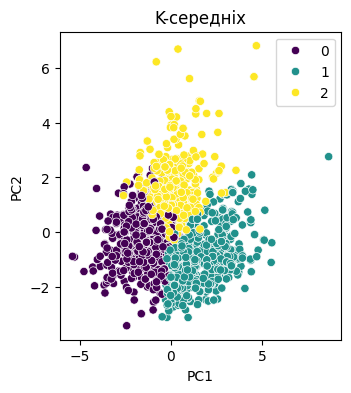

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-середніх')
plt.xlabel('PC1')
plt.ylabel('PC2')

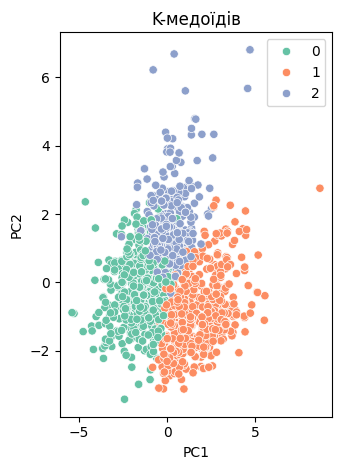

In [6]:
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels, palette='Set2')
plt.title('K-медоїдів')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

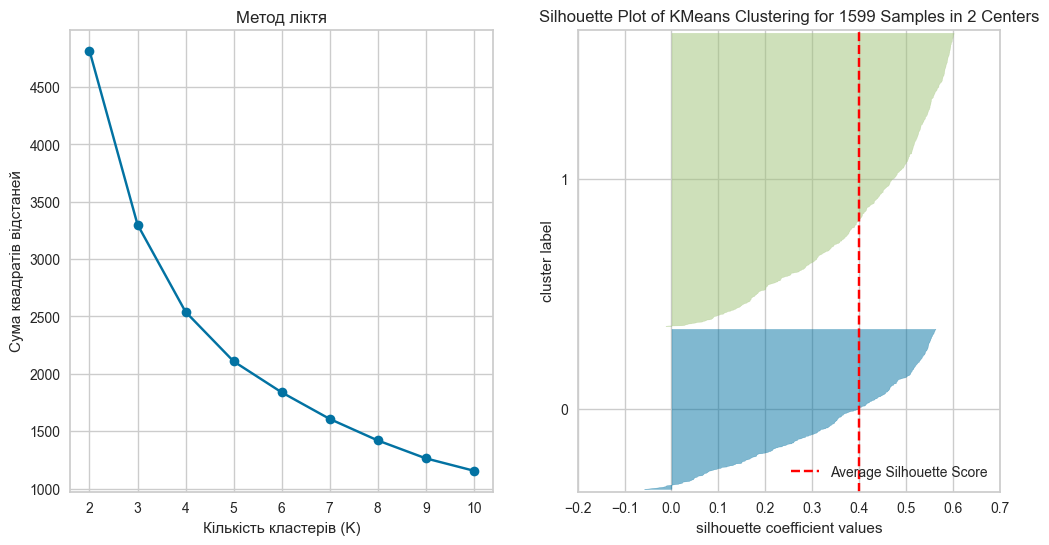

0.3981650124985865


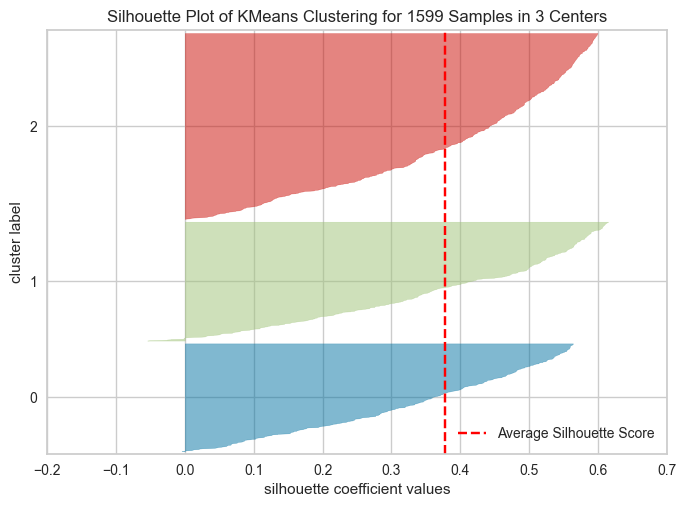

0.37786478074568447


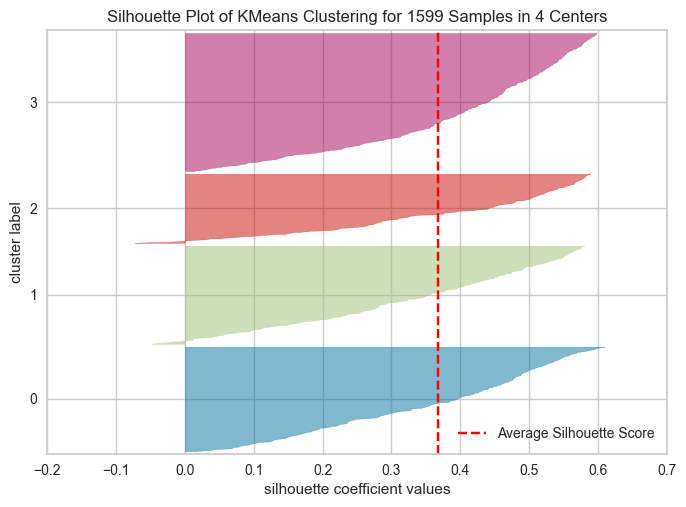

0.3673072560034996


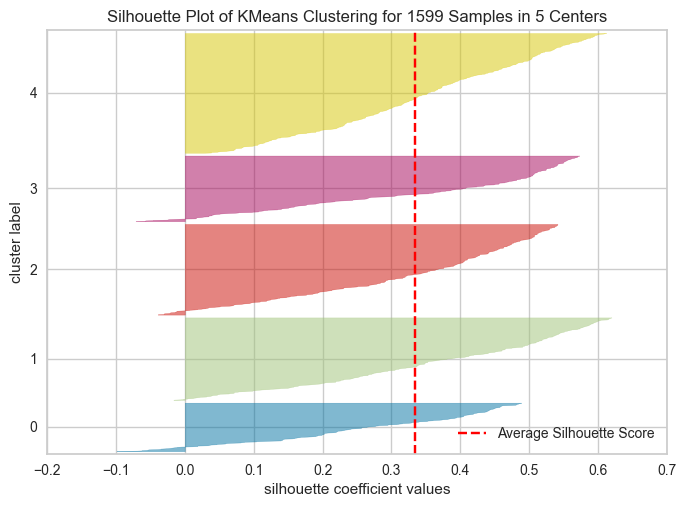

0.3341651824438189


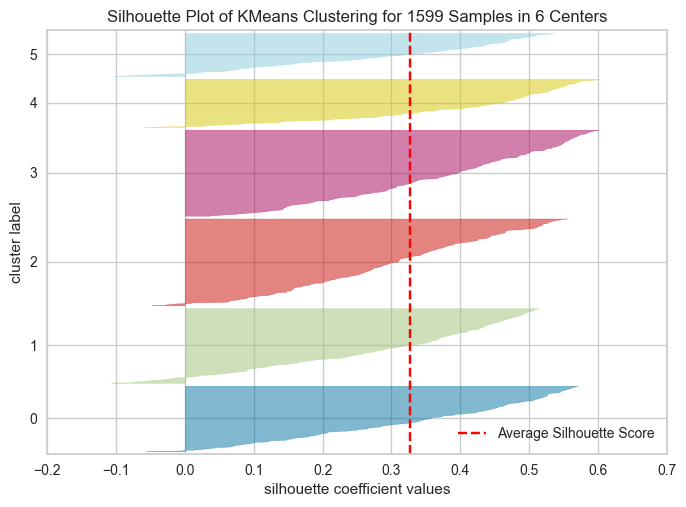

0.3265433878379471


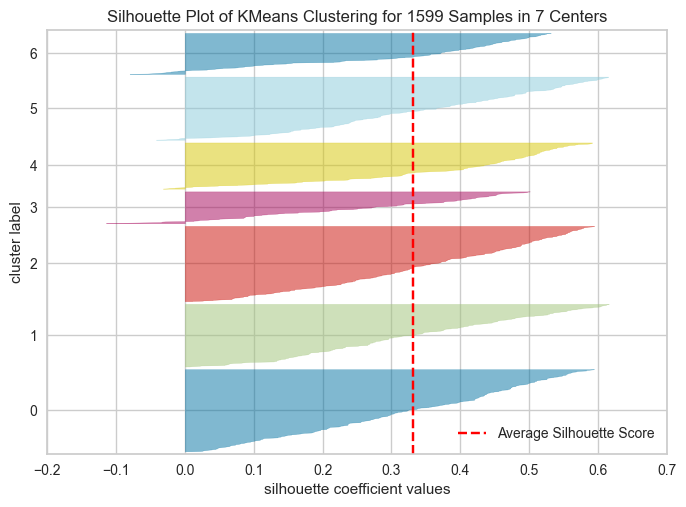

0.331676287001998


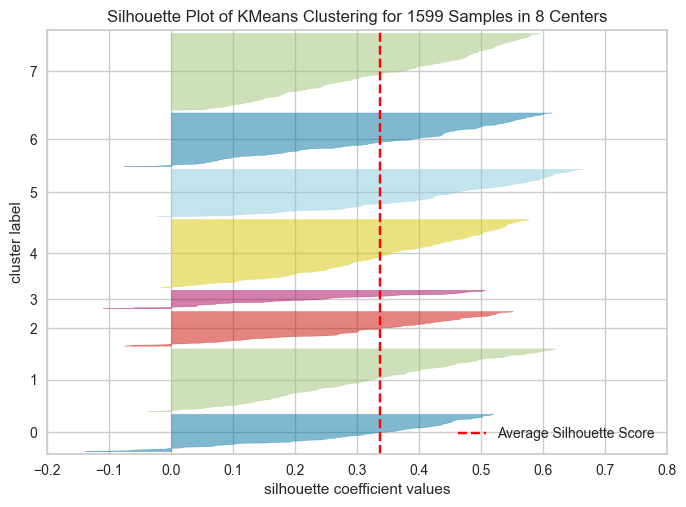

0.3377053350516165


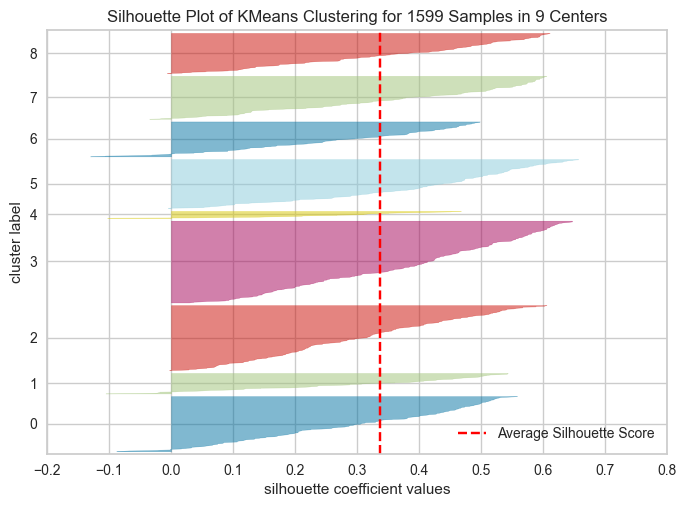

0.33736846415076305


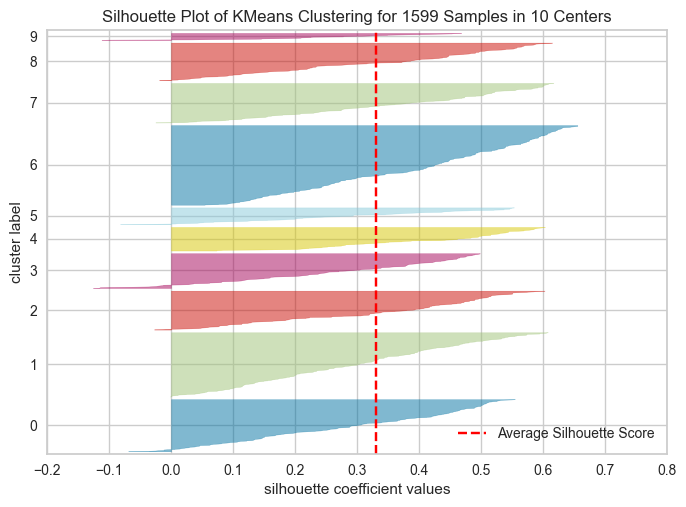

0.33097243497519446


In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Визначити оптимальне значення кластерів
inertia = []
silhouette_scores = []
K_range = range(2, 11)


optimal_k_elbow = None
optimal_k_silhouette = None
max_silhouette_score = -1

# Визначимо оптимальне значення кластерів для методу ліктя та силуетного методу
plt.figure(figsize=(12, 6))

# 1. Метод ліктя (Elbow Method)
plt.subplot(1, 2, 1)  # Перша панель
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)  # використовуємо X_pca
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o', color='b')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Сума квадратів відстаней')

# 2. Силуетний метод (Silhouette Method)
plt.subplot(1, 2, 2)  # Друга панель
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_pca)  # використовуємо X_pca
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_pca)  # Підлаштовуємо для X_pca
    visualizer.ax.set_title(f'Silhouette for k={k}')
    visualizer.show()  # Виводимо для кожного k

    # Обчислюємо силуэтний коефіцієнт для кожного k
    silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
    print(silhouette_avg)
    silhouette_scores.append(silhouette_avg)
    
    # Визначаємо найкращий силуэт
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_k_silhouette = k

In [36]:
from kneed import KneeLocator

# Пошук оптимального k за методом ліктя
kneedle = KneeLocator(K_range, inertia, curve='convex', direction='decreasing')
optimal_k_elbow = kneedle.knee

print(f'Автоматично знайдене оптимальне k (метод ліктя): {optimal_k_elbow}')
print(f'Оптимальне значення k за силуетним методом: {optimal_k_silhouette}')

Автоматично знайдене оптимальне k (метод ліктя): 4
Оптимальне значення k за силуетним методом: 2


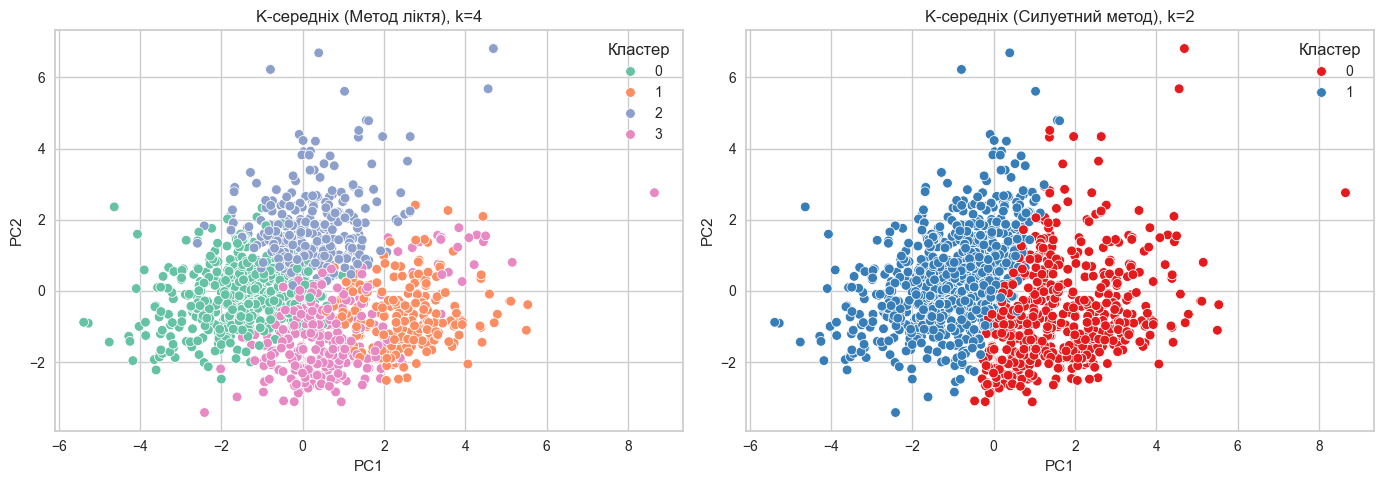

In [37]:
# Кластеризація з оптимальними значеннями
kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans_labels_elbow = kmeans_elbow.fit_predict(X_scaled)

kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans_labels_silhouette = kmeans_silhouette.fit_predict(X_scaled)

# Візуалізація
plt.figure(figsize=(14, 5))

# Візуалізація для k, знайденого методом ліктя
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels_elbow, palette='Set2')
plt.title(f'K-середніх (Метод ліктя), k={optimal_k_elbow}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер', loc='best')

# Візуалізація для k, знайденого методом силуету
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels_silhouette, palette='Set1')
plt.title(f'K-середніх (Силуетний метод), k={optimal_k_silhouette}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер', loc='best')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn_extra\cluster\_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn_extra\cluster\_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


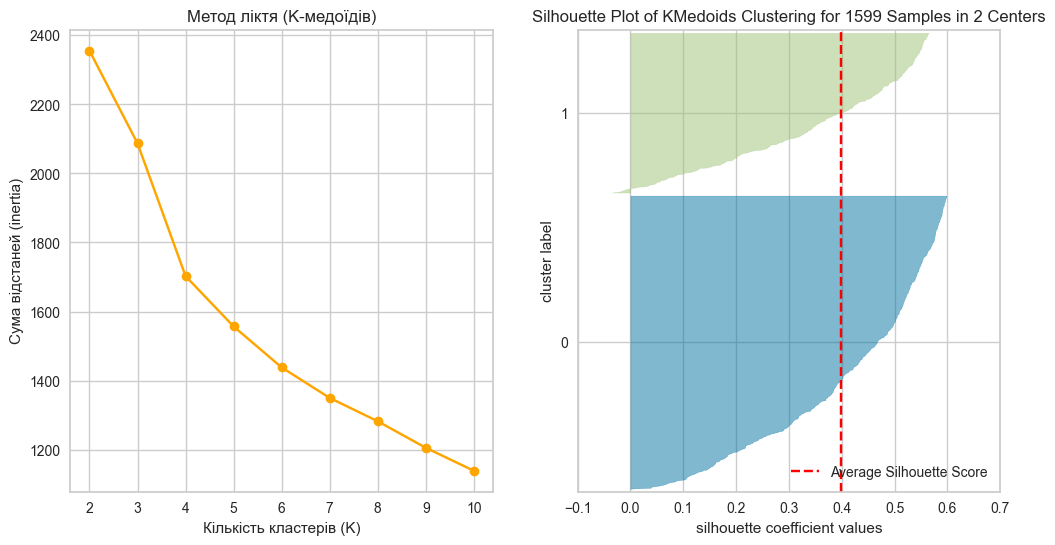

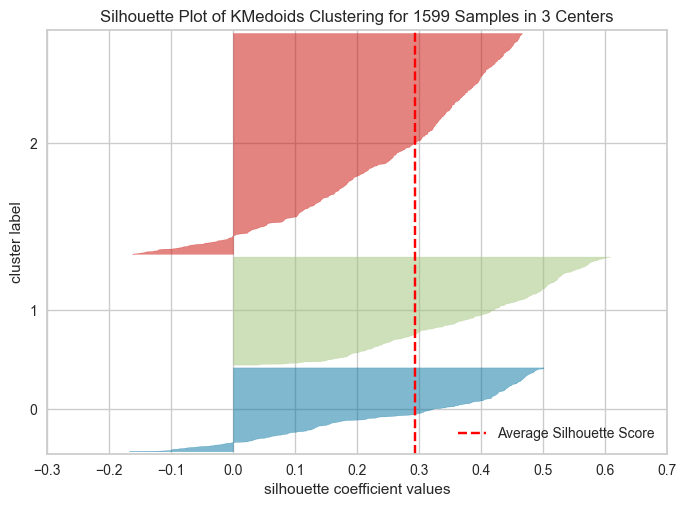

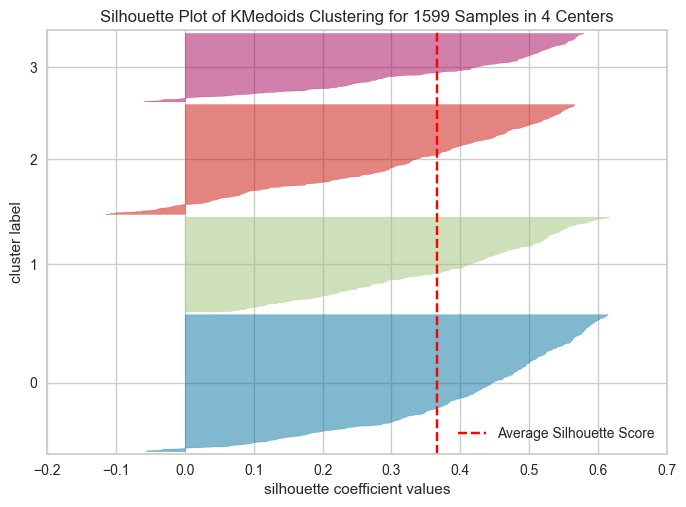

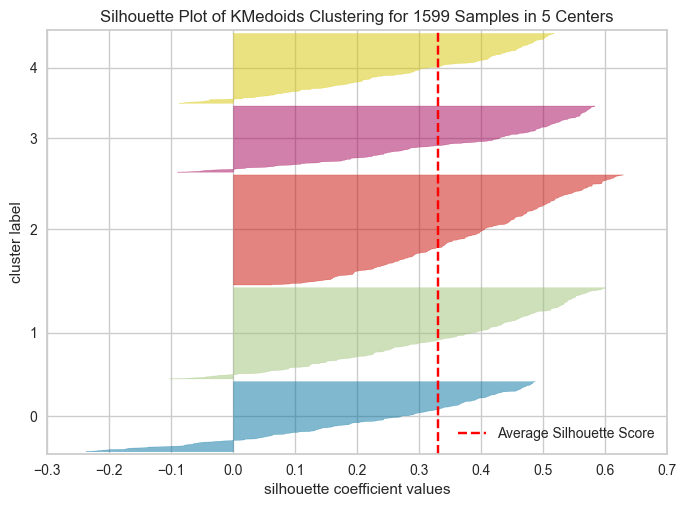

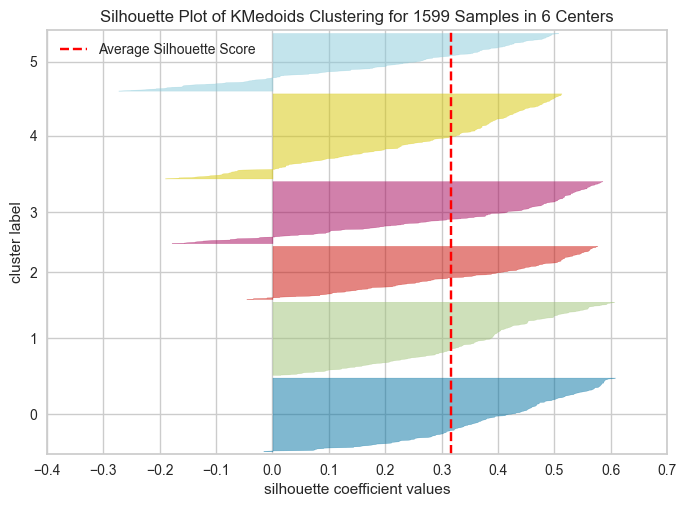

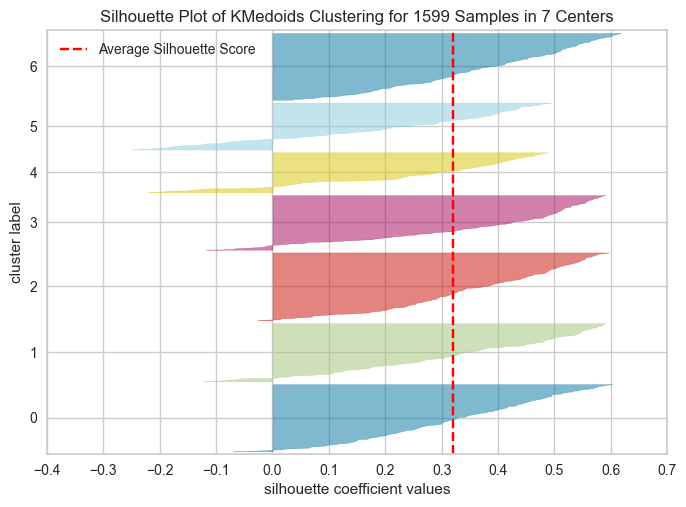

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn_extra\cluster\_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


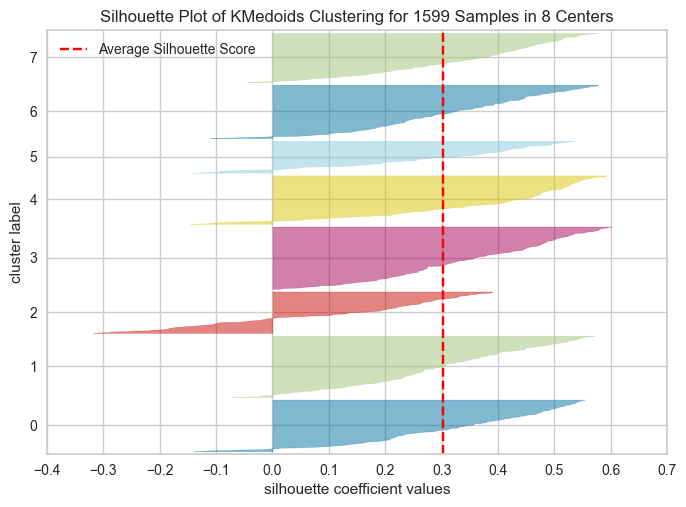

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn_extra\cluster\_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


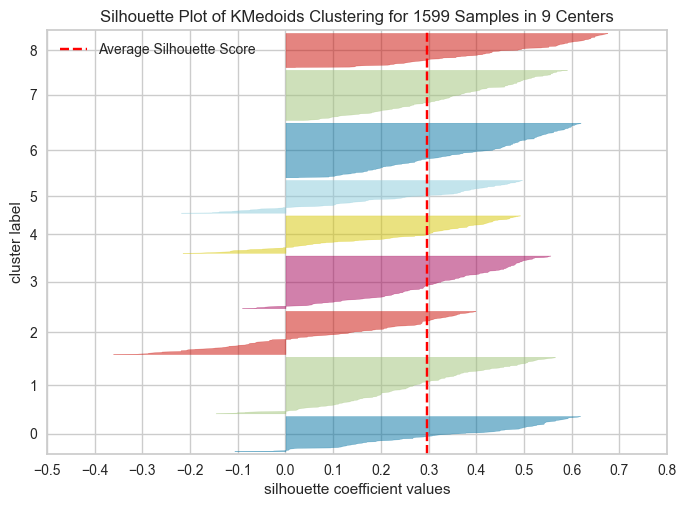

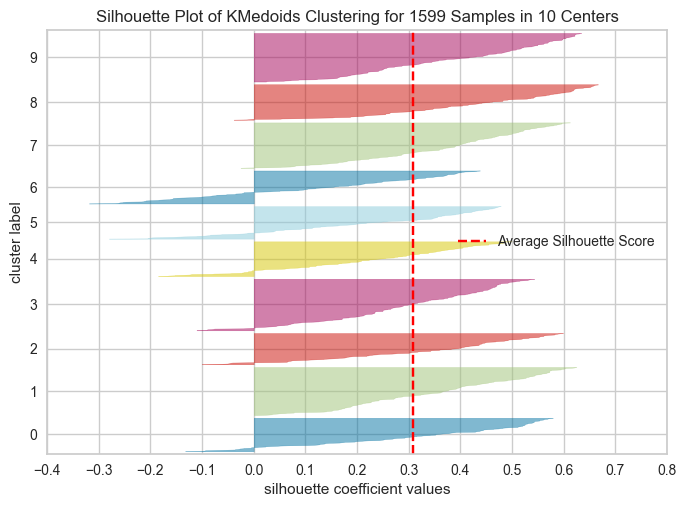

In [38]:
# Змінні для збереження результатів
inertia_medoid = []
silhouette_scores_medoid = []
K_range = range(2, 11)

optimal_k_elbow_medoid = None
optimal_k_silhouette_medoid = None
max_silhouette_score_medoid = -1

# Графіки
plt.figure(figsize=(12, 6))

# 1. Метод ліктя (для медоїдів)
plt.subplot(1, 2, 1)
for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam', init='k-medoids++')
    kmedoids.fit(X_pca)
    inertia_medoid.append(kmedoids.inertia_)

plt.plot(K_range, inertia_medoid, marker='o', color='orange')
plt.title('Метод ліктя (K-медоїдів)')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Сума відстаней (inertia)')

# 2. Силуетний метод
plt.subplot(1, 2, 2)
for k in K_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42, method='pam', init='k-medoids++')
    kmedoids.fit(X_pca)

    # Візуалізація
    visualizer = SilhouetteVisualizer(kmedoids, colors='yellowbrick')
    visualizer.fit(X_pca)
    visualizer.ax.set_title(f'Silhouette for k={k}')
    visualizer.show()

    # Силуетний коефіцієнт
    silhouette_avg = silhouette_score(X_pca, kmedoids.labels_)
    silhouette_scores_medoid.append(silhouette_avg)

    if silhouette_avg > max_silhouette_score_medoid:
        max_silhouette_score_medoid = silhouette_avg
        optimal_k_silhouette_medoid = k

In [39]:
# Пошук оптимального k за методом ліктя
kneedle = KneeLocator(K_range, inertia_medoid, curve='convex', direction='decreasing')
optimal_k_elbow = kneedle.knee

print(f'Автоматично знайдене оптимальне k (метод ліктя): {optimal_k_elbow}')
print(f'Оптимальне значення k за силуетним методом: {optimal_k_silhouette}')

Автоматично знайдене оптимальне k (метод ліктя): 4
Оптимальне значення k за силуетним методом: 2


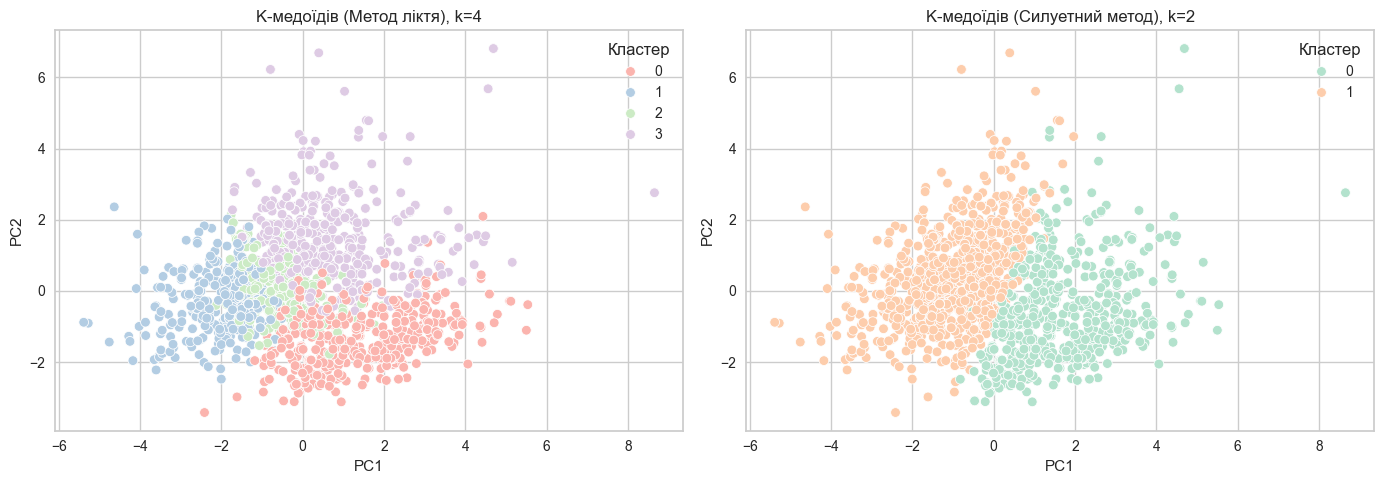

In [40]:
# Кластеризація медоїдами з оптимальними k
kmedoids_elbow = KMedoids(n_clusters=optimal_k_elbow, random_state=42, metric='euclidean')
kmedoids_labels_elbow = kmedoids_elbow.fit_predict(X_scaled)

kmedoids_silhouette = KMedoids(n_clusters=optimal_k_silhouette, random_state=42, metric='euclidean')
kmedoids_labels_silhouette = kmedoids_silhouette.fit_predict(X_scaled)

# Візуалізація
plt.figure(figsize=(14, 5))

# Візуалізація для k, знайденого методом ліктя
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels_elbow, palette='Pastel1')
plt.title(f'K-медоїдів (Метод ліктя), k={optimal_k_elbow}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер', loc='best')

# Візуалізація для k, знайденого методом силуету
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels_silhouette, palette='Pastel2')
plt.title(f'K-медоїдів (Силуетний метод), k={optimal_k_silhouette}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Кластер', loc='best')

plt.tight_layout()
plt.show()

In [45]:
# Оцінити якість кластеризації (не менше ніж 2-ма методами)
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Оцінка для KMeans (оптимальне k, знайдене за методом ліктя або силуету)
kmeans = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Оцінка для KMedoids (оптимальне k, знайдене за методом ліктя або силуету)
kmedoids = KMedoids(n_clusters=optimal_k_elbow, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# 1. Silhouette Score для KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score для KMeans (k={optimal_k_elbow}): {silhouette_kmeans}')

# 2. Calinski-Harabasz Index для KMeans
calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f'Calinski-Harabasz Index для KMeans (k={optimal_k_elbow}): {calinski_kmeans}')

# 3. Silhouette Score для KMedoids
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
print(f'Silhouette Score для KMedoids (k={optimal_k_elbow}): {silhouette_kmedoids}')

# 4. Calinski-Harabasz Index для KMedoids
calinski_kmedoids = calinski_harabasz_score(X_scaled, kmedoids_labels)
print(f'Calinski-Harabasz Index для KMedoids (k={optimal_k_elbow}): {calinski_kmedoids}')

# Оцінка для KMeans (оптимальне k, знайдене за методом ліктя або силуету)
kmeans = KMeans(n_clusters=optimal_k_silhouette, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Оцінка для KMedoids (оптимальне k, знайдене за методом ліктя або силуету)
kmedoids = KMedoids(n_clusters=optimal_k_silhouette, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# 1. Silhouette Score для KMeans
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score для KMeans (k={optimal_k_silhouette}): {silhouette_kmeans}')

# 2. Calinski-Harabasz Index для KMeans
calinski_kmeans = calinski_harabasz_score(X_scaled, kmeans_labels)
print(f'Calinski-Harabasz Index для KMeans (k={optimal_k_silhouette}): {calinski_kmeans}')

# 3. Silhouette Score для KMedoids
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
print(f'Silhouette Score для KMedoids (k={optimal_k_silhouette}): {silhouette_kmedoids}')

# 4. Calinski-Harabasz Index для KMedoids
calinski_kmedoids = calinski_harabasz_score(X_scaled, kmedoids_labels)
print(f'Calinski-Harabasz Index для KMedoids (k={optimal_k_silhouette}): {calinski_kmedoids}')

Silhouette Score для KMeans (k=4): 0.18518319806170758
Calinski-Harabasz Index для KMeans (k=4): 265.27416235680556
Silhouette Score для KMedoids (k=4): 0.08279349560715096
Calinski-Harabasz Index для KMedoids (k=4): 224.54708798122613
Silhouette Score для KMeans (k=2): 0.2137299633550709
Calinski-Harabasz Index для KMeans (k=2): 363.1813083084194
Silhouette Score для KMedoids (k=2): 0.2080943115999437
Calinski-Harabasz Index для KMedoids (k=2): 356.85856491728407


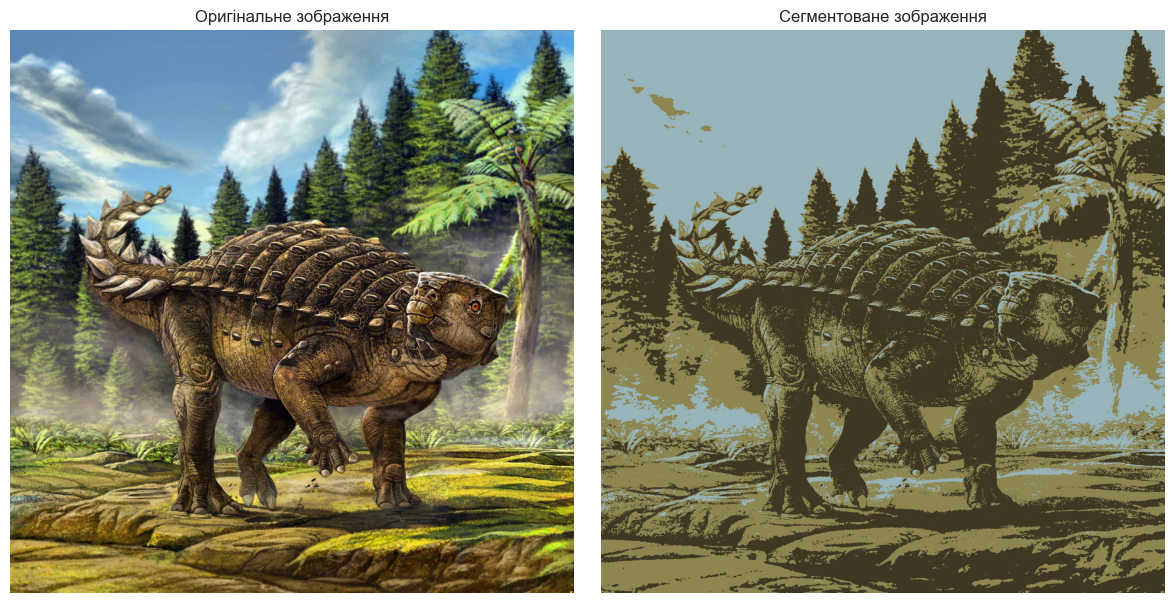

In [48]:
# Застосувати будь-який з алгоритмів кластеризації для вирішення практичної задачі обробки зображень
from skimage import io
from skimage.color import rgb2lab, lab2rgb

image = io.imread('photo.jpg')
image = image / 255.0  # Нормалізуємо значення пікселів до діапазону [0, 1]

# Перетворення зображення в 2D масив пікселів (кожен піксель - це рядок)
pixels = image.reshape(-1, 3)  # Змінюємо зображення на 2D масив розміром (кількість пікселів, 3 кольори RGB)

# Стандартизуємо дані (опціонально)
scaler = StandardScaler()
pixels_scaled = scaler.fit_transform(pixels)

# Використовуємо KMeans для кластеризації пікселів
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 кластери для 3 основних кольорів
kmeans.fit(pixels_scaled)

# Повертаємо пікселі до оригінальних значень
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = scaler.inverse_transform(segmented_image)

segmented_image = segmented_image.reshape(image.shape)

# Візуалізація результату
plt.figure(figsize=(12, 6))

# Оригінальне зображення
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Оригінальне зображення")
plt.axis('off')

# Сегментоване зображення
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Сегментоване зображення")
plt.axis('off')

plt.tight_layout()
plt.show()